<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# GitHub - Track issues on projects
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/GitHub/GitHub_Track_issues_on_projects.ipynb" target="_parent"><img src="https://naasai-public.s3.eu-west-3.amazonaws.com/open_in_naas.svg"/></a>

**Tags:** #github #repos #issues #operations #analytics #csv #plotly

**Author:** [Sanjeet Attili](https://www.linkedin.com/in/sanjeet-attili-760bab190/)

The objective of the notebook is to maintain a track of issues that are open in the community roadmap

## Input

### Imports libraries

In [2]:
import plotly.express as px
from naas_drivers import github

### Setup GitHub
**How to find your personal access token on Github?** 
- First we need to create a personal access token to get the details of our organization from here: https://github.com/settings/tokens
- You will be asked to select scopes for the token. Which scopes you choose will determine what information and actions you will be able to perform against the API. 
- You should be careful with the ones prefixed with write:, delete: and admin: as these might be quite destructive. 
- You can find description of each scope in docs here (https://docs.github.com/en/developers/apps/building-oauth-apps/scopes-for-oauth-apps).

In [3]:
# Project URL from web
PROJECT_URL = "https://github.com/orgs/jupyter-naas/projects"

# GitHub Token
GITHUB_TOKEN = "ghp_COJiJEU4cQR4rjsxxxxxx"

### Setup variables

In [14]:
# Graph : bar order
STATUS_ORDER = ["Backlog", "To Do", "In Progress", "Review", "Done"]

# Outputs
csv_output = "GitHub_Issues.csv"

## Model

### Get issues from project on Github

In [5]:
df_issues = github.connect(GITHUB_TOKEN).projects.get_issues(PROJECT_URL)
df_issues.tail(15)

,issue_status,issue_state,link_to_the_issue,issue_number,issue_title,issue_labels,issue_assignees,comments_till_date,last_created_date,last_created_time,last_updated_date,last_updated_time,stale_issue,comments,linked_pr_state,PR_activity,project_id,project_name
115,Done,closed,https://github.com/jupyter-naas/awesome-notebo...,971,HubSpot - Send LinkedIn invitations from contacts,"good first issue, sales, score: 4",FlorentLvr,1,2022-05-03,16:34:47,2022-05-12,14:33:20,No activity since 25 days,['Hi @Valpiquard ! Stop spending your time inv...,None,None,4,Community Roadmap
116,Done,closed,https://github.com/jupyter-naas/awesome-notebo...,993,Data.gouv.fr - Récupération des données légale...,"good first issue, opendata, score: 1",FlorentLvr,1,2022-05-04,14:30:29,2022-05-09,07:47:05,No activity since 28 days,"['@jravenel , following the bug reported on so...",None,None,4,Community Roadmap
117,Done,closed,https://github.com/jupyter-naas/awesome-notebo...,992,Insee - Téléchargement du PDF recapitulatif de...,"good first issue, opendata, score: 2",FlorentLvr,1,2022-05-04,14:22:00,2022-05-09,07:48:19,No activity since 28 days,"['@jravenel , following the bug reported on so...",None,None,4,Community Roadmap
118,Done,closed,https://github.com/jupyter-naas/awesome-notebo...,990,Python - Download PDF from URL,"good first issue, operations, score: 1",FlorentLvr,1,2022-05-04,13:55:53,2022-05-09,07:51:34,No activity since 28 days,"['@jravenel, this notebook is a snippet code t...",None,None,4,Community Roadmap
119,Done,closed,https://github.com/jupyter-naas/awesome-notebo...,997,Yahoo - Send daily predictions to Notion DB,"enhancement, opendata, score: 3",FlorentLvr,1,2022-05-06,08:16:55,2022-05-09,07:44:33,No activity since 28 days,"['@jravenel ! Following our community call, th...",None,None,4,Community Roadmap
120,Done,closed,https://github.com/jupyter-naas/awesome-notebo...,432,GitHub - Add new Github issues as page in Noti...,"good first issue, operations, score: 3",SanjuEpic,2,2022-03-31,15:07:02,2022-05-11,15:47:16,No activity since 26 days,['\n🚀 Branch and template have been created an...,None,None,4,Community Roadmap
121,Done,closed,https://github.com/jupyter-naas/awesome-notebo...,428,LinkedIn - Update metrics from posts in Notion...,"enhancement, content, score: 5",FlorentLvr,1,2022-03-31,13:10:10,2022-05-10,15:51:31,No activity since 27 days,['Save post stats in CSV to be reused in other...,None,None,4,Community Roadmap
122,Done,closed,https://github.com/jupyter-naas/awesome-notebo...,1012,AWS - Send dataframe to S3,"good first issue, operations, score: 1",Dr0p42,1,2022-05-11,15:39:01,2022-05-11,15:40:26,No activity since 26 days,"['@jravenel , template available here that all...",None,None,4,Community Roadmap
123,Done,closed,https://github.com/jupyter-naas/awesome-notebo...,1013,AWS - Read dataframe from S3,"good first issue, operations, score: 1",Dr0p42,1,2022-05-11,15:41:22,2022-05-11,15:42:36,No activity since 26 days,"['@jravenel , here is the template : https://g...",None,None,4,Community Roadmap
124,Done,closed,https://github.com/jupyter-naas/awesome-notebo...,956,Fix Societe.com / Societe.ninja template and f...,bug,"jravenel, FlorentLvr, vlacomme",7,2022-04-22,18:08:51,2022-05-14,09:27:26,No activity since 23 days,['Good point @vlacomme thanks for bringing tha...,None,None,4,Community Roadmap


### Create barchart

In [15]:
for index, s in enumerate(STATUS_ORDER):
    print(index, s)

0 Backlog
1 To Do
2 In Progress
3 Review
4 Done


In [16]:
def create_barchart(df, title, labels):
    # Get status
    status = df.issue_status.unique().tolist()
    status_order = []
    for index, s in enumerate(STATUS_ORDER):
        if s in status:
            status_order += [s]
    
    # Create fig
    fig = px.bar(df,
                 title=title,
                 x=status_order,
                 y="count",
                 text="count",
                 labels=labels)
    fig.update_traces(marker_color='black')
    fig.update_layout(
        plot_bgcolor="#ffffff",
        width=1000,
        height=800,
        font=dict(family="Arial", size=14, color="black"),
        paper_bgcolor="white",
        yaxis_title="No of issues",
        yaxis_title_font=dict(family="Arial", size=11, color="black"),
        xaxis_title="Status",
        xaxis_title_font=dict(family="Arial", size=11, color="black"),
        margin_pad=10,
    )
    fig.show()
    return fig

## Output

### Save data in csv

In [ ]:
df_issues.to_csv(csv_output, index=False)

### Plotting a bar graph for total number of issues

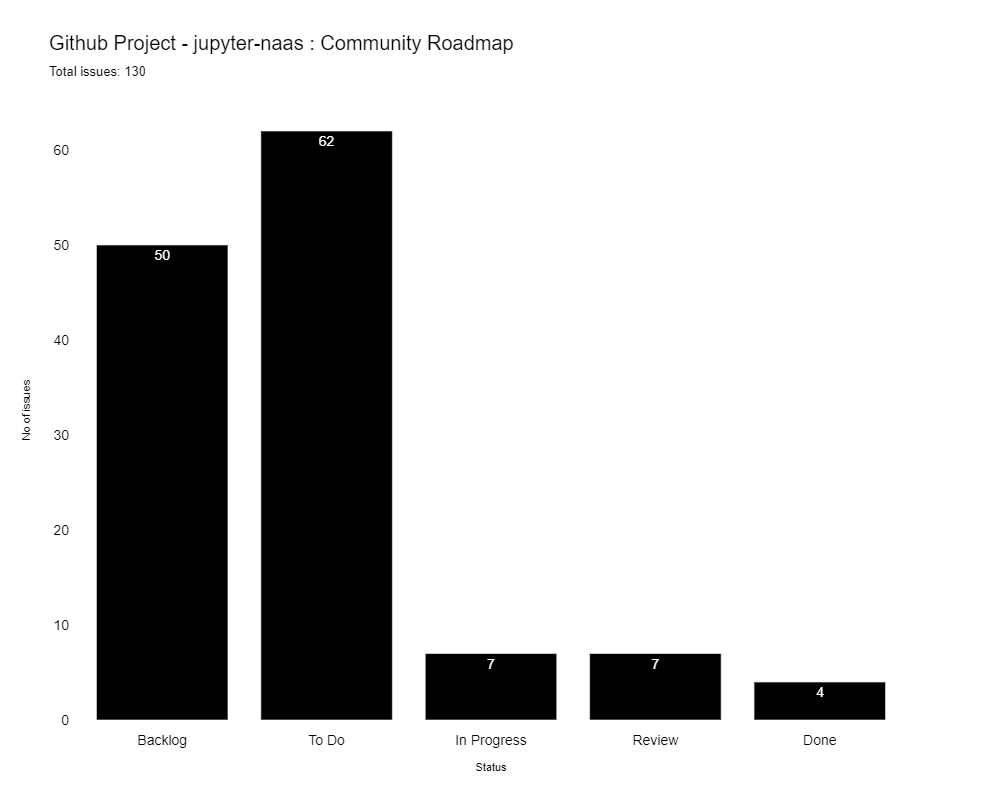

In [17]:
# Dataframe
issues = df_issues.groupby('issue_status').agg({'issue_number':'count'}).reset_index().rename(columns={"issue_number":"count"})

# Chart title
title =  f"Github Project - {PROJECT_URL.split('/')[-2]} : {df_issues['project_name'].unique()[0]} <br><span style='font-size: 13px;'>Total issues: {issues['count'].sum()}</span>"

# Hover labels
labels = {
    'issue_status':'Issue status',
    'count':"Number of Issues"
}
fig = create_barchart(issues, title, labels)

### Plotting a bar graph for open issues

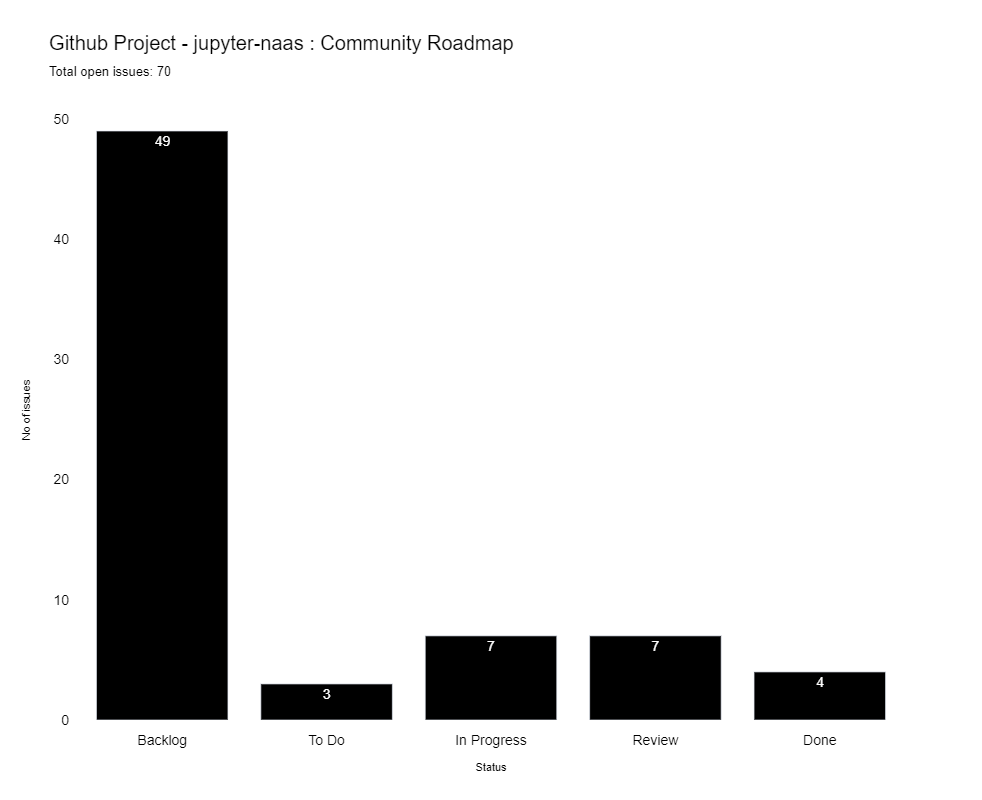

In [18]:
# Dataframe
open_issues = df_issues[df_issues['issue_state']=='open'].groupby('issue_status').agg({"issue_number":'count'}).reset_index().rename(columns={'issue_number':'count'})

# Chart title
title =  f"Github Project - {PROJECT_URL.split('/')[-2]} : {df_issues['project_name'].unique()[0]} <br><span style='font-size: 13px;'>Total open issues: {open_issues['count'].sum()}</span>"

# Hover labels
labels = {
               'issue_status':'Issue status',
               'count':"Number of Open issues"
          }
fig = create_barchart(open_issues, title, labels)

### Plotting a bar graph for closed issues

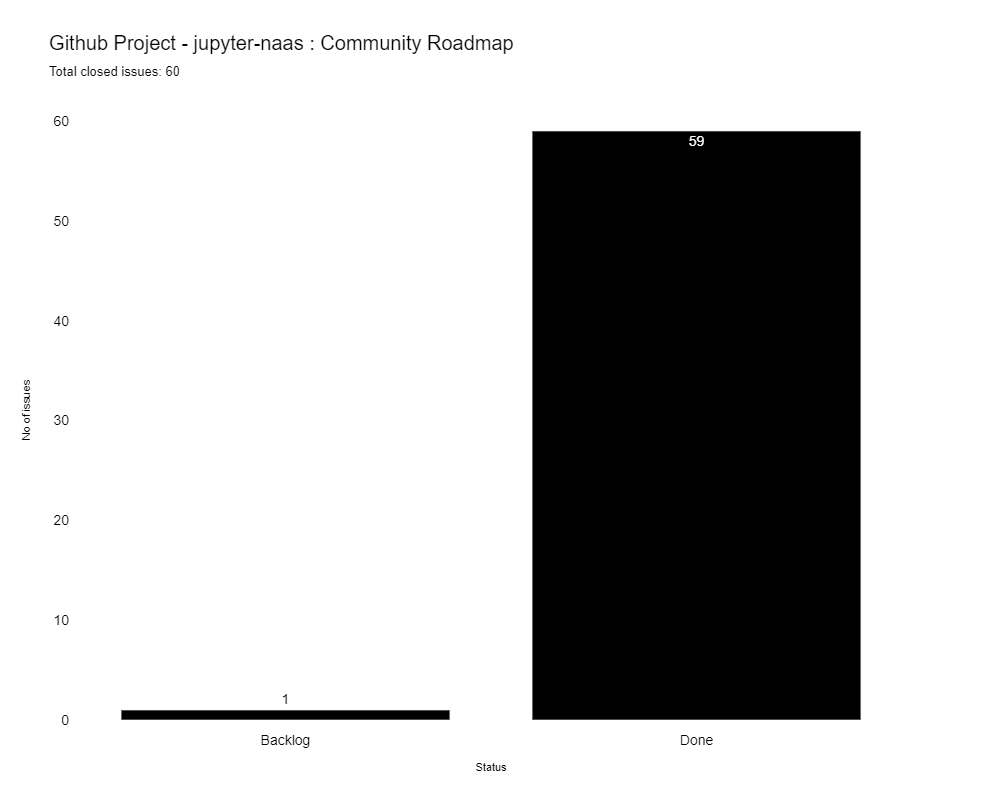

In [20]:
# Dataframe
closed_issues = df_issues[df_issues['issue_state']=='closed'].groupby('issue_status').agg({"issue_number":'count'}).reset_index().rename(columns={'issue_number':'count'})

# Chart title
title =  f"Github Project - {PROJECT_URL.split('/')[-2]} : {df_issues['project_name'].unique()[0]} <br><span style='font-size: 13px;'>Total closed issues: {closed_issues['count'].sum()}</span>"

# Hover labels
labels = {
               'issue_status':'Issue status',
               'count':"Number of Closed issues"
          }

fig = create_barchart(closed_issues, title, labels)

### Plotting a bar graph for stale issues

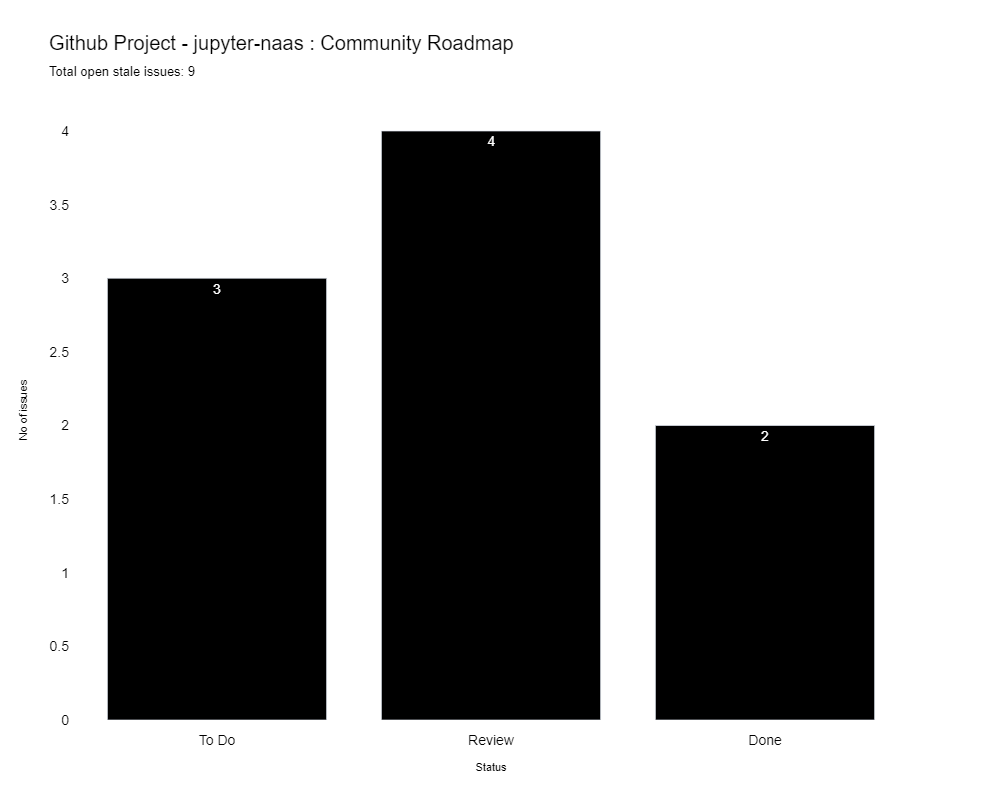

In [21]:
stale_issues = []
for item in df_issues.stale_issue:
    if item!='None':
        stale_issues.append(int(item.split()[-2])>=7)
    else:
         stale_issues.append(False)
            
df_issues['stale_bool'] = stale_issues
temp = df_issues[df_issues['stale_bool']==True]
temp[temp['issue_state']=='open']

# Dataframe
open_stale_issues = temp[temp['issue_state']=='open'].groupby('issue_status').agg({"stale_bool":'count'}).reset_index().rename(columns={'stale_bool':'count'})

# Chart title
title =  f"Github Project - {PROJECT_URL.split('/')[-2]} : {df_issues['project_name'].unique()[0]} <br><span style='font-size: 13px;'>Total open stale issues: {open_stale_issues['count'].sum()}</span>"

# Hover labels
labels = {
               'issue_status':'Issue status',
               'count':"Number of Open issues with no activity since more than 7 days"
          }
fig = create_barchart(open_stale_issues, title, labels)